## Logistic Regressive Single Neural Network
- Input Layer
- Hidden Layer
- Output Layer

In [1]:
import numpy as np

### 1. __init()__ 메서드에 Loss Function 결과를 저장할 리스트 만들기

In [2]:
def __init__(self):
    self.w = None
    self.b = None
    self.loss = []

### 2. 정방향과 역방향 계산

In [3]:
def fwrd(self, x):
    z =  np.sum(x * self.w) + self.b
    return z

def bwrd(self, x, err):
    w_grad = x * err
    b_grad = 1 * err
    return w_grad, b_grad

### 3. activation

In [4]:
def activation(self, z):
    a = 1 / (1 + np.exp(-z))
    return a

### 4. 손실 함수의 결과값 조정

#### 4-1. 매 epoch마다 훈련 세트의 샘플 순서를 섞어 사용하기
- 모든 경사하강법들은 매 epoch마다 훈련 세트의 샘플 순서를 섞어 가중치의 최적값을 계산한다
- 훈련 세트의 샘플 순서를 섞으면 가중치 최적값의 탐색 과정이 다양해져 가중치 최적값을 제대로 찾을 수 있다
- 이를 위한 전형적인 방법은 numpy 배열의 index를 섞은 후 index 순서대로 샘플을 뽑는 것 (번호표를 따로 섞은 다음 번호표 순서대로 훈련 세트를 나열)
- np.random.permutation()을 사용

#### 4-2. self.activation() 메서드로 계산한 a는 np.log()의 계산을 위해 한 번 더 조정
- a가 0에 가까워지면 np.log()함수의 값은 음의 무한대가 되고 
- a가 1에 가까워지면 np.log()함수의 값은 0이 되기 때문
- 따라서, 손실값이 무한해지면 정확한 계산을 할 수 없으므로 a의 값이 $$(-1*10^{-10}, 1 - 1 * 10^{10})$$ 사이가 되도록 np.clip() 함수로 조정
- np.clip(): 주어진 범위 밖의 값을 범위 양 끝의 값으로 잘라냄

#### 4-3. self.loss에 저장
- 샘플마다 손실 함수를 계산하고 그 결과를 모두 더한 다음 샘플 개수로 나눈 평균값 저장

In [5]:
def fit(self, x, y, epochs = 100):
    self.w = np.ones(x.shape[1])
    self.b = 0
    
    for i in range(epochs):
        loss = 0
        # [4-1]: index 섞기
        indexes = np.random.permutation(np.arange(len(x))) # 인덱스를 섞음
        for i in indexes:
            z = self.fwrd(x[i])
            a = self.activation(z)
            err = -(y[i] - a)
            w_grad, b_grad = self.bwrd(x[i], err)
            self.w -= w_grad
            self.b -= b_grad
        # [4-2]: np.clip으로 주어진 밖의 값을 제거함
            a = np.clip(a, 1e-10, 1-1e-10)
            loss += -(y[i] * np.log(a) + (1 - y[i]) * np.log(1 - a))
        # [4-3]: self.loss에 저장
        self.loss.append(loss/len(y))

### 5. predict()와 score() 메서드 추가
- predict():
    - z > 0.5 == (sigmoid > 0.5)
    - z < 0.5 == (sigmoid < 0.5)
    - predict()메서드에 굳이 sigmoid 추가 하지 않음
- score(): 정확도를 직접 계산하기 위함

In [6]:
def predict(self, x):
    z = [self.fwrd(x_i) for x_i in x] # 정방향 계산
    return np.array(z) > 0 # 임계 함수 (계단 함수 적용)

def score(self, x, y):
    return np.mean(self.predict(x) == y)

### 6. 지금까지 작성한 코드 클래스화 하기

In [7]:
class SingleLayer:

    def __init__(self):
        self.w = None
        self.b = None
        self.loss = []

    def fwrd(self, x):
        z =  np.sum(x * self.w) + self.b
        return z

    def bwrd(self, x, err):
        w_grad = x * err
        b_grad = 1 * err
        return w_grad, b_grad

    def activation(self, z):
        a = 1 / (1 + np.exp(-z))
        return a

    def fit(self, x, y, epochs = 100):
        self.w = np.ones(x.shape[1])
        self.b = 0

        for i in range(epochs):
            loss = 0
            # [4-1]: index 섞기
            indexes = np.random.permutation(np.arange(len(x))) # 인덱스를 섞음
            for i in indexes:
                z = self.fwrd(x[i])
                a = self.activation(z)
                err = -(y[i] - a)
                w_grad, b_grad = self.bwrd(x[i], err)
                self.w -= w_grad
                self.b -= b_grad
            # [4-2]: np.clip으로 주어진 밖의 값을 제거함
                a = np.clip(a, 1e-10, 1-1e-10)
                loss += -(y[i] * np.log(a) + (1 - y[i]) * np.log(1 - a))
            # [4-3]: self.loss에 저장
            self.loss.append(loss/len(y))

    def predict(self, x):
        z = [self.fwrd(x_i) for x_i in x] # 정방향 계산
        return np.array(z) > 0 # 임계 함수 (계단 함수 적용)

    def score(self, x, y):
        return np.mean(self.predict(x) == y)

### 7. 유방암 데이터에 적용

In [8]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
x = cancer.data
y = cancer.target

In [12]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.33, random_state = 42)
print('x:', x_train.shape, x_test.shape)
print('y:', y_train.shape, y_test.shape)

x: (381, 30) (188, 30)
y: (381,) (188,)


In [13]:
layer = SingleLayer()
layer.fit(x_train, y_train)
layer.score(x_test, y_test)

0.9680851063829787

### 8. 손실 함수 누적 값 확인하기

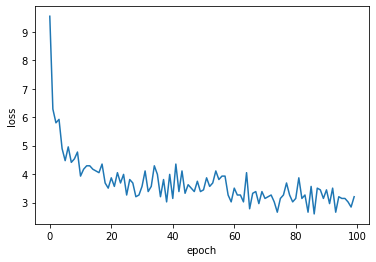

In [14]:
import matplotlib.pyplot as plt
plt.plot(layer.loss)
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

Epoch가 진행 됨에 따라 Logistic Loss function의 값이 감소 하고 있음을 확인 함